<div style="text-align:center">
  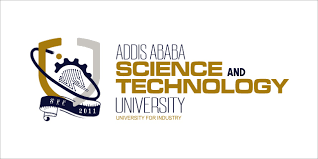
</div>

**Section A**
AI Group Assignment
---
| No. | Name              | ID       |
| --- | ----------------- | ---------- |
| 1.  | Adane Moges       | Ets0079/13 |
| 2.  | Abdulmajid Awol   | Ets0016/13 |
| 3.  | Abel Atkelet      | Ets0020/13 |
| 4.  | Amanuel Mandefrow | Ets0122/13 |
| 5.  | Elias Balude      | Ets0237/12 |




# **1. Breadth First Search (BFS)**
><p>BFS is a traversing algorithm where we should start traversing from a selected node (source or starting node) and traverse the graph layer wise thus exploring the neighbor nodes (nodes which are directly connected to source node). we must then move towards the next-level neighbor nodes</p>

In [ ]:
from collections import deque
def bfs(graph, start, goal):
    """
    Breadth First Search (BFS) algorithm

    Args:
        graph: A dictionary representing the graph
        start: The starting node

    Returns:
        A list of nodes visited in BFS order
    """

    visited = []
    queue = deque([start])

    while queue:
        node = queue.popleft()
        visited.append(node)
        if node == goal:
          return ('I found :', goal, 'visited:', visited)
          break
        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append(neighbor)

    return 'not found', 'visited: ',list(visited)
graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F", "G"],
    "D": [],
    "E": [],
    "F": [],
    "G": []
}

print(bfs(graph, "A", 'C'))


# **2. Depth First Search (DFS)**
>The DFS algorithm is a recursive algorithm that uses the idea of backtracking. It involves exhaustive searches of all the nodes by going ahead, if possible, else by backtracking

In [ ]:


def dfs(graph, start, goal):
    """
    Depth First Search (DFS) algorithm

    Args:
        graph: A dictionary representing the graph
        start: The starting node

    Returns:
        A list of nodes visited in DFS order
    """

    visited = []
    stack = [start]

    while stack:
        node = stack.pop()
        visited.append(node)
            if node == goal:
            return ('I found :', goal, 'visited :', visited)
            break
        for neighbor in graph[node][::-1]:
            if neighbor not in visited:
                stack.append(neighbor)

    return list(visited)
graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F", "G"],
    "D": [],
    "E": [],
    "F": [],
    "G": []
}

print(dfs(graph, "A", 'C'))

# **3. Depth limited search**
>Depth limited search is an uninformed search algorithm which is similar to Depth First Search(DFS). It can be
considered equivalent to DFS with a predetermined depth limit 'l'. Nodes at depth l are considered to be nodes
without any successors.
Depth limited search may be thought of as a solution to DFS's infinite path problem; in the Depth limited
search algorithm, DFS is run for a finite depth 'l', where 'l' is the depth limit.

In [6]:
def dls(graph, start, goal, limit):
    """
    Depth Limited Search (DLS) algorithm

    Args:
        graph: A dictionary representing the graph
        start: The starting node
        goal: The goal node
        limit: The depth limit

    Returns:
        A list of nodes visited in DLS order, or None
        if the goal is not found within the depth limit
    """

    visited = []
    stack = [(start, 0)]

    while stack:
        node, depth = stack.pop()
        visited.append(node)
        if node == goal:
            return list(visited)
        if depth == limit:
            continue
        for neighbor in graph[node][::-1]:
            if neighbor not in visited:
                stack.append((neighbor, depth + 1))

    return None

graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F", "G"],
    "D": [],
    "E": [],
    "F": [],
    "G": ['H'],
    "H": []
}

limit = 1

print(dls(graph, "A", "C", limit))


['A', 'B', 'C']


# **4.Iterative Deepening Depth First Search**
>IDS combines the benefits of DFS with Breadth First Search (BFS). The graph is explored using DFS, but the
depth limit steadily increased until the target is located. In other words, IDS continually runs DFS, raising the
depth limit each time, until the desired result is obtained. Iterative deepening is a method that makes sure the
search is thorough (i.e., it discovers a solution if one exists) and efficient (i.e., it finds the shortest path to the
goal).

In [ ]:


def ids(graph, start, goal):
    """
    Iterative Deepening Depth First Search (IDS) algorithm

    Args:
        graph: A dictionary representing the graph
        start: The starting node
        goal: The goal node

    Returns:
        A list of nodes visited in IDS order, or None
        if the goal is not found
    """

    for limit in range(1, len(graph)):
        result = dls(graph, start, goal, limit)
        if result:
            return result

    return None

graph = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F", "G"],
    "D": [],
    "E": [],
    "F": [],
    "G": []
}

print(ids(graph, "A", "G"))


# **5. uniform cost search**
>Uniform Cost Search is the best algorithm for a search problem, which does not involve the use of heuristics. It
can solve any general graph for optimal cost. Uniform Cost Search as it sounds searches in branches that are
more or less the same in cost. The algorithm’s worst-case time and space complexity are both in O(b1+⌊C* ⁄
ε⌋).

In [ ]:
import heapq
import math

def ucs(graph, start, goal):
    """
    Uniform Cost Search (UCS) algorithm

    Args:
        graph: A dictionary representing the graph
        start: The starting node
        goal: The goal node

    Returns:
        A list of nodes visited in UCS order, or None
        if the goal is not found
    """

    # Create a priority queue to store the nodes to be visited
    queue = [(0, start, start)]

    # Create a dictionary to store the cost to reach each node
    costs = {start: 0}

    # Create a dictionary to store the path to each node
    paths = {start: [start]}

    # While the queue is not empty
    while queue:
        # Get the node with the lowest cost
        cost, node, path = heapq.heappop(queue)

        # If the node is the goal, return the path
        if node == goal:
            return path
        print(path)

        # For each neighbor of the node
        for neighbor in graph[node]:
            # Calculate the cost to reach the neighbor
            new_cost = costs[node] + graph[node][neighbor]

            # If the neighbor is not in the costs dictionary, or the new cost is less than the
            # cost stored in the dictionary
            if neighbor not in costs or new_cost < costs[neighbor]:
                # Update the cost to reach the neighbor
                costs[neighbor] = new_cost

                # Update the path to the neighbor
                paths[neighbor] = path + neighbor

                # Add the neighbor to the queue
                heapq.heappush(queue, (new_cost, neighbor, path + neighbor))

    # If the goal was not found, return None
    return None
# Function calling
graph = {
    "A": {"B": 1, "C": 4},
    "B": {"C": 2, "D": 1},
    "C": {"D": 2, "E": 3},
    "D": {"E": 1},
    "E": {}
}

print(ucs(graph, "A", "E"))


### **6. Bidirectional search algorithm**
>  Bidirectional search algorithm is a graph search
 algorithm that runs two simultaneous searches from both directions of a graph.




In [4]:
# Python3 program for Bidirectional BFS
# Search to check path between two vertices

# Class definition for node to
# be added to graph
class AdjacentNode:

    def __init__(self, vertex):

        self.vertex = vertex
        self.next = None

# BidirectionalSearch implementation
class BidirectionalSearch:

    def __init__(self, vertices):

        # Initialize vertices and
        # graph with vertices
        self.vertices = vertices
        self.graph = [None] * self.vertices

        # Initializing queue for forward
        # and backward search
        self.src_queue = list()
        self.dest_queue = list()

        # Initializing source and
        # destination visited nodes as False
        self.src_visited = [False] * self.vertices
        self.dest_visited = [False] * self.vertices

        # Initializing source and destination
        # parent nodes
        self.src_parent = [None] * self.vertices
        self.dest_parent = [None] * self.vertices

    # Function for adding undirected edge
    def add_edge(self, src, dest):

        # Add edges to graph

        # Add source to destination
        node = AdjacentNode(dest)
        node.next = self.graph[src]
        self.graph[src] = node

        # Since graph is undirected add
        # destination to source
        node = AdjacentNode(src)
        node.next = self.graph[dest]
        self.graph[dest] = node

    # Function for Breadth First Search
    def bfs(self, direction = 'forward'):

        if direction == 'forward':

            # BFS in forward direction
            current = self.src_queue.pop(0)
            connected_node = self.graph[current]

            while connected_node:
                vertex = connected_node.vertex

                if not self.src_visited[vertex]:
                    self.src_queue.append(vertex)
                    self.src_visited[vertex] = True
                    self.src_parent[vertex] = current

                connected_node = connected_node.next
        else:

            # BFS in backward direction
            current = self.dest_queue.pop(0)
            connected_node = self.graph[current]

            while connected_node:
                vertex = connected_node.vertex

                if not self.dest_visited[vertex]:
                    self.dest_queue.append(vertex)
                    self.dest_visited[vertex] = True
                    self.dest_parent[vertex] = current

                connected_node = connected_node.next

    # Check for intersecting vertex
    def is_intersecting(self):

        # Returns intersecting node
        # if present else -1
        for i in range(self.vertices):
            if (self.src_visited[i] and
                self.dest_visited[i]):
                return i

        return -1

    # Print the path from source to target
    def print_path(self, intersecting_node,
                   src, dest):

        # Print final path from
        # source to destination
        path = list()
        path.append(intersecting_node)
        i = intersecting_node

        while i != src:
            path.append(self.src_parent[i])
            i = self.src_parent[i]

        path = path[::-1]
        i = intersecting_node

        while i != dest:
            path.append(self.dest_parent[i])
            i = self.dest_parent[i]

        print("*****Path*****")
        path = list(map(str, path))

        print(' '.join(path))

    # Function for bidirectional searching
    def bidirectional_search(self, src, dest):

        # Add source to queue and mark
        # visited as True and add its
        # parent as -1
        self.src_queue.append(src)
        self.src_visited[src] = True
        self.src_parent[src] = -1

        # Add destination to queue and
        # mark visited as True and add
        # its parent as -1
        self.dest_queue.append(dest)
        self.dest_visited[dest] = True
        self.dest_parent[dest] = -1

        while self.src_queue and self.dest_queue:

            # BFS in forward direction from
            # Source Vertex
            self.bfs(direction = 'forward')

            # BFS in reverse direction
            # from Destination Vertex
            self.bfs(direction = 'backward')

            # Check for intersecting vertex
            intersecting_node = self.is_intersecting()

            # If intersecting vertex exists
            # then path from source to
            # destination exists
            if intersecting_node != -1:
                print(f"Path exists between {src} and {dest}")
                print(f"Intersection at : {intersecting_node}")
                self.print_path(intersecting_node,
                                src, dest)
                break
        return -1

# Driver code
if __name__ == '__main__':

    # Number of Vertices in graph
    n = 15

    # Source Vertex
    src = 0

    # Destination Vertex
    dest = 14

    # Create a graph
    graph = BidirectionalSearch(n)
    graph.add_edge(0, 4)
    graph.add_edge(1, 4)
    graph.add_edge(2, 5)
    graph.add_edge(3, 5)
    graph.add_edge(4, 6)
    graph.add_edge(5, 6)
    graph.add_edge(6, 7)
    graph.add_edge(7, 8)
    graph.add_edge(8, 9)
    graph.add_edge(8, 10)
    graph.add_edge(9, 11)
    graph.add_edge(9, 12)
    graph.add_edge(10, 13)
    graph.add_edge(10, 14)

    out = graph.bidirectional_search(src, dest)

    if out == -1:
        print(f"Path does not exist between {src} and {dest}")

Path exists between 0 and 14
Intersection at : 7
*****Path*****
0 4 6 7 8 10 14
Path does not exist between 0 and 14


## **7. BFS(best first search)**
> The best first search uses the concept of a priority queue and heuristic search. It is a search algorithm that
works on a specific rule. The aim is to reach the goal from the initial state via the shortest path. The best First
Search algorithm in artificial intelligence is used for for finding the shortest path from a given starting node to
a goal node in a graph. The algorithm works by expanding the nodes of the graph in order of increasing the
distance from the starting node until the goal node is reached

In [1]:
from queue import PriorityQueue

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v, w):
        if u not in self.graph:
            self.graph[u] = {}
        self.graph[u][v] = w

    def best_first_search(self, start, end):
        visited = set()
        pq = PriorityQueue()
        pq.put((0, start))
        while not pq.empty():
            cost, node = pq.get()
            if node == end:
                return cost
            visited.add(node)
            for neighbor, weight in self.graph[node].items():
                if neighbor not in visited:
                    pq.put((weight, neighbor))
        return None

g = Graph()
g.add_edge('A', 'B', 5)
g.add_edge('A', 'C', 10)
g.add_edge('B', 'D', 8)
g.add_edge('C', 'D', 12)
g.add_edge('D', 'E', 6)

start = 'A'
end = 'E'
print(f"The shortest path between {start} and {end} is: {g.best_first_search(start, end)}")


The shortest path between A and E is: ['A', 'B', 'D', 'E'] with a cost of 19


##  **8. A* search**
> A* is a popular and widely used graph traversal and pathfinding algorithm. It is employed in various
applications, including robotics, video games, and artificial intelligence. The primary purpose of A* is to find
the shortest path from a starting point to a goal in a graph, considering the cost of traversing each edge

In [ ]:
from queue import PriorityQueue

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v, w):
        if u not in self.graph:
            self.graph[u] = {}
        self.graph[u][v] = w

    def a_star_search(self, start, end):
        visited = set()
        pq = PriorityQueue()
        pq.put((0, start))
        while not pq.empty():
            cost, node = pq.get()
            if node == end:
                return cost
            visited.add(node)
            for neighbor, weight in self.graph[node].items():
                if neighbor not in visited:
                    pq.put((weight + cost, neighbor))
        return None

g = Graph()
g.add_edge('A', 'B', 5)
g.add_edge('A', 'C', 10)
g.add_edge('B', 'D', 8)
g.add_edge('C', 'D', 12)
g.add_edge('D', 'E', 6)

start = 'A'
end = 'E'
print(f"The shortest path between {start} and {end} is: {g.a_star_search(start, end)}")


The shortest path between A and E is: 19


## 9. **AO* algorithm**
 >*The* AO* method divides any given difficult problem into a smaller group of problems that are then resolved using the AND-OR graph concept. AND OR graphs are specialized graphs that are used in problems that can be divided into smaller problems. The AND side of the graph represents a set of tasks that must be completed to achieve the main goal, while the OR side of the graph represents different methods for accomplishing the same main goal.

In [7]:
# Cost to find the AND and OR path
def Cost(H, condition, weight = 1):
	cost = {}
	if 'AND' in condition:
		AND_nodes = condition['AND']
		Path_A = ' AND '.join(AND_nodes)
		PathA = sum(H[node]+weight for node in AND_nodes)
		cost[Path_A] = PathA

	if 'OR' in condition:
		OR_nodes = condition['OR']
		Path_B =' OR '.join(OR_nodes)
		PathB = min(H[node]+weight for node in OR_nodes)
		cost[Path_B] = PathB
	return cost

# Update the cost
def update_cost(H, Conditions, weight=1):
	Main_nodes = list(Conditions.keys())
	Main_nodes.reverse()
	least_cost= {}
	for key in Main_nodes:
		condition = Conditions[key]
		print(key,':', Conditions[key],'>>>', Cost(H, condition, weight))
		c = Cost(H, condition, weight)
		H[key] = min(c.values())
		least_cost[key] = Cost(H, condition, weight)
	return least_cost

# Print the shortest path
def shortest_path(Start,Updated_cost, H):
	Path = Start
	if Start in Updated_cost.keys():
		Min_cost = min(Updated_cost[Start].values())
		key = list(Updated_cost[Start].keys())
		values = list(Updated_cost[Start].values())
		Index = values.index(Min_cost)

		# FIND MINIMIMUM PATH KEY
		Next = key[Index].split()
		# ADD TO PATH FOR OR PATH
		if len(Next) == 1:

			Start =Next[0]
			Path += '<--' +shortest_path(Start, Updated_cost, H)
		# ADD TO PATH FOR AND PATH
		else:
			Path +='<--('+key[Index]+') '

			Start = Next[0]
			Path += '[' +shortest_path(Start, Updated_cost, H) + ' + '

			Start = Next[-1]
			Path += shortest_path(Start, Updated_cost, H) + ']'

	return Path



H = {'A': -1, 'B': 5, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G': 3, 'H': 0, 'I':0, 'J':0}

Conditions = {
'A': {'OR': ['B'], 'AND': ['C', 'D']},
'B': {'OR': ['E', 'F']},
'C': {'OR': ['G'], 'AND': ['H', 'I']},
'D': {'OR': ['J']}
}
# weight
weight = 1
# Updated cost
print('Updated Cost :')
Updated_cost = update_cost(H, Conditions, weight=1)
print('*'*75)
print('Shortest Path :\n',shortest_path('A', Updated_cost,H))


Updated Cost :
D : {'OR': ['J']} >>> {'J': 1}
C : {'OR': ['G'], 'AND': ['H', 'I']} >>> {'H AND I': 2, 'G': 4}
B : {'OR': ['E', 'F']} >>> {'E OR F': 8}
A : {'OR': ['B'], 'AND': ['C', 'D']} >>> {'C AND D': 5, 'B': 9}
***************************************************************************
Shortest Path :
 A<--(C AND D) [C<--(H AND I) [H + I] + D<--J]
